In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
train = pd.read_csv('train.csv')
train = train.drop('Id', axis=1)
price = train['SalePrice']
test = pd.read_csv('test.csv')

In [65]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [66]:
pd.set_option('display.max_rows', 100)
nan = train.isna().sum()
print(nan.to_dict())

{'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 259, 'LotArea': 0, 'Street': 0, 'Alley': 1369, 'LotShape': 0, 'LandContour': 0, 'Utilities': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 872, 'MasVnrArea': 8, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinSF1': 0, 'BsmtFinType2': 38, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 1, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'TotRmsAbvGrd': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt

In [67]:
# train['LotFrontage'].mode()
# train['Alley'].notna() #drop
# train['MasVnrType'] # nan как отдельный тип 0 
# train['BsmtQual'] # fill 0
# train['MasVnrArea'] # fill 0
# train['BsmtCond'] # fill 0 
# train['BsmtExposure'] # fill 0
# train['BsmtFinType1'] # fill 0
# train['BsmtFinType2'] #  fill 0 
# train['Electrical'].mode()
# train['FireplaceQu'] # fill 0 
# train['GarageType'] # fill 0 
# train['GarageYrBlt'] # fill 0
# train['GarageFinish'] #fill 0 
# train['GarageQual'] #fill 0 
# train['GarageCond'] #fill 0 
# train['PoolQC'].drop()
# train['Fence'].drop()
# train['MiscFeature'].drop()



<Axes: title={'center': 'Распределение цен на дома'}, xlabel='Price', ylabel='Count'>

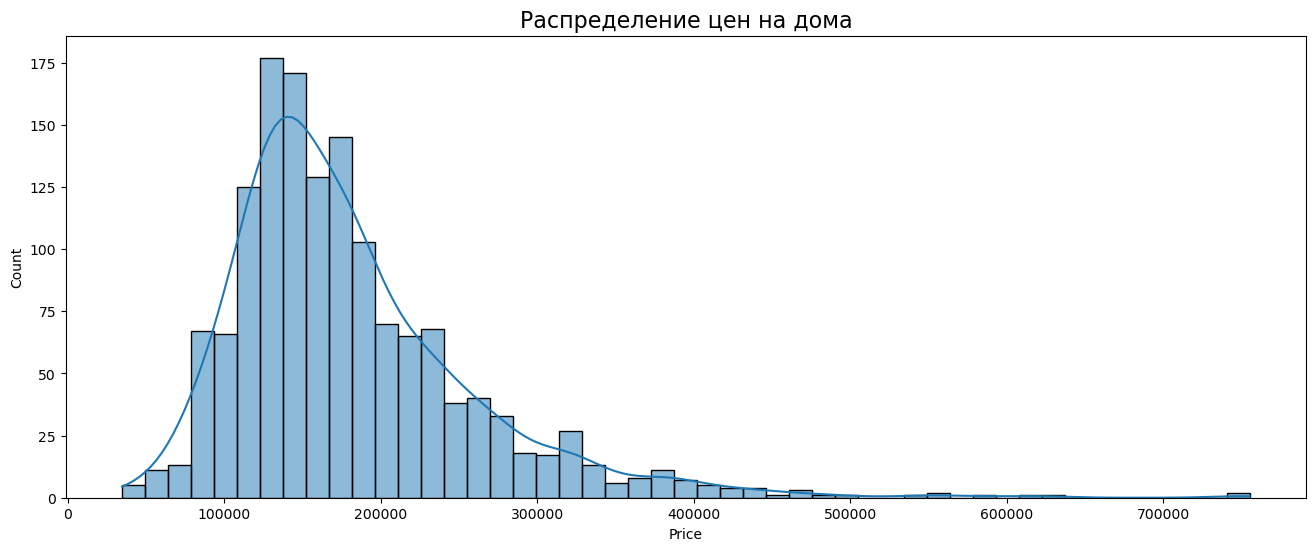

In [68]:
plt.figure(figsize=(16,6))
plt.title('Распределение цен на дома', fontsize=16)
plt.xlabel('Price')
sns.histplot(price, kde=True)

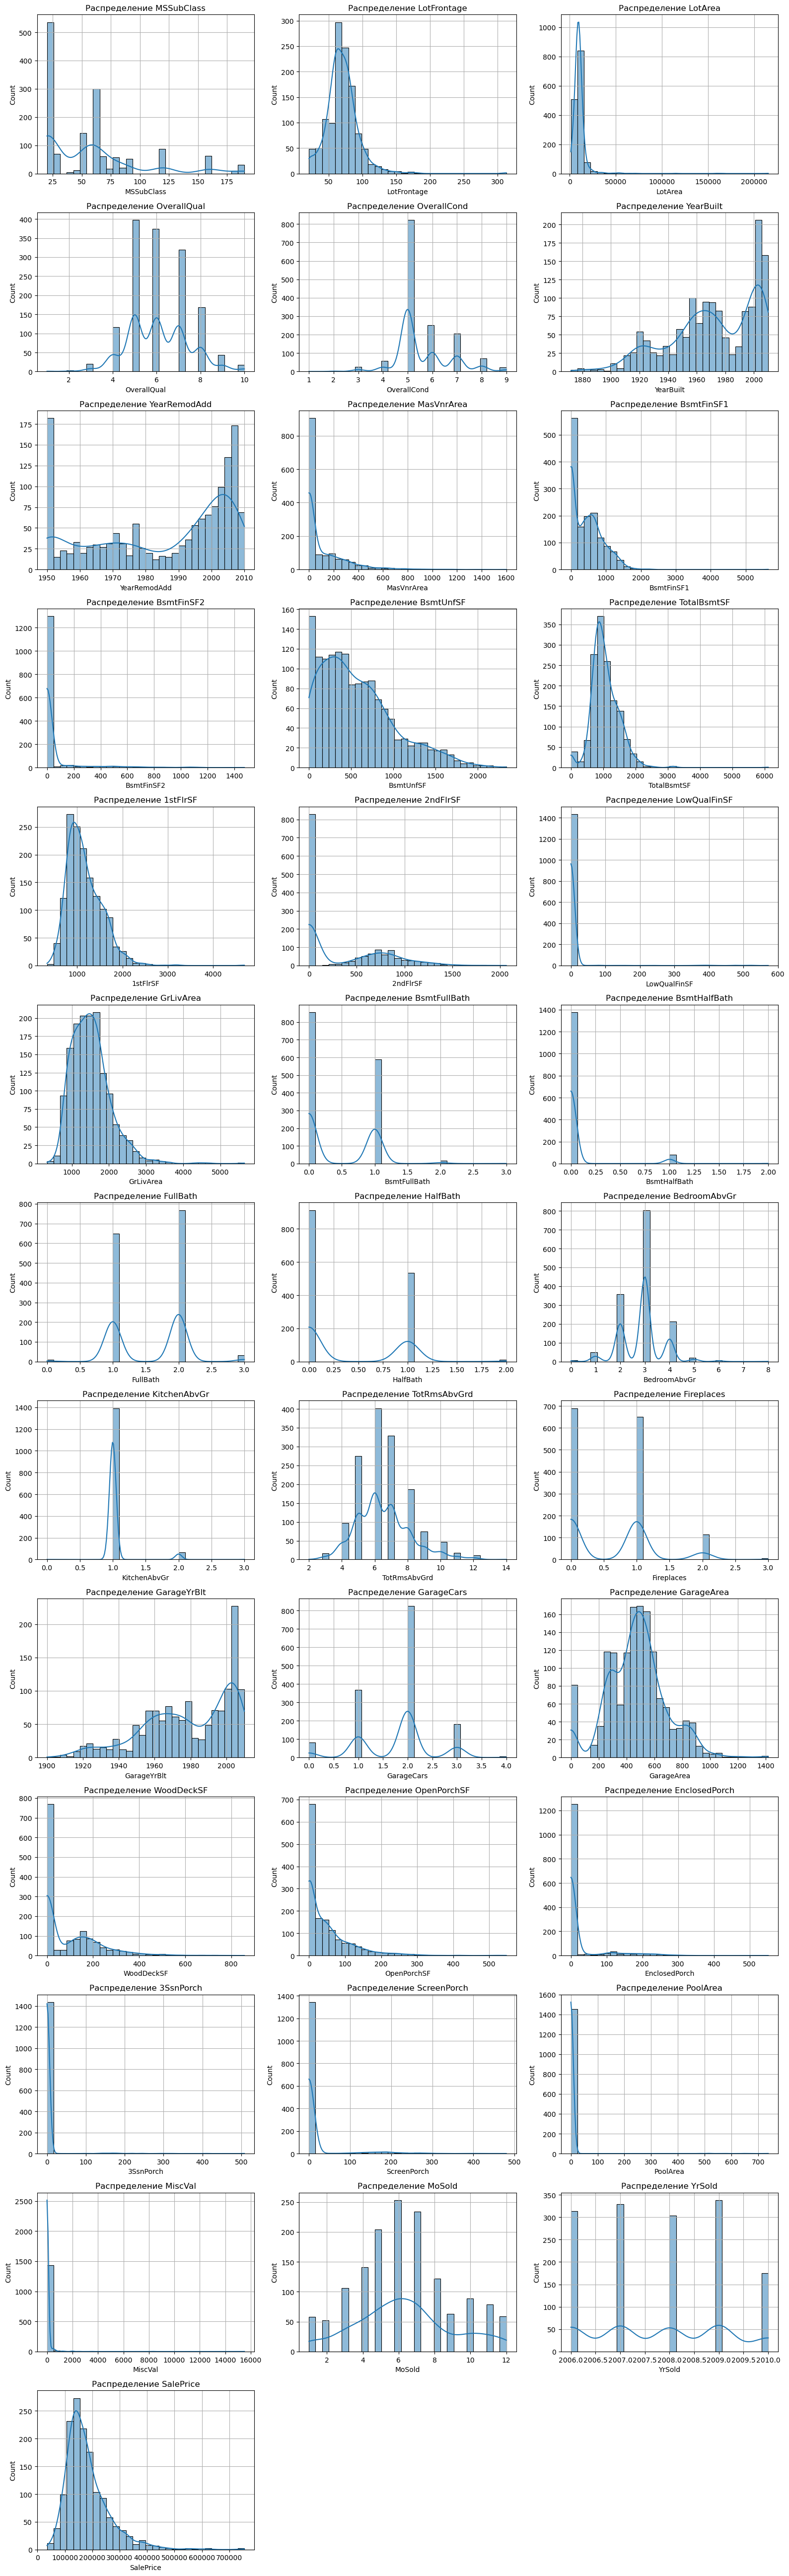

In [69]:
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns
n_numeric = len(numeric_features)
cols = 3
rows = (n_numeric // cols) + int(n_numeric % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Распределение {col}')
    axes[i].grid(True)

for i in range(n_numeric, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

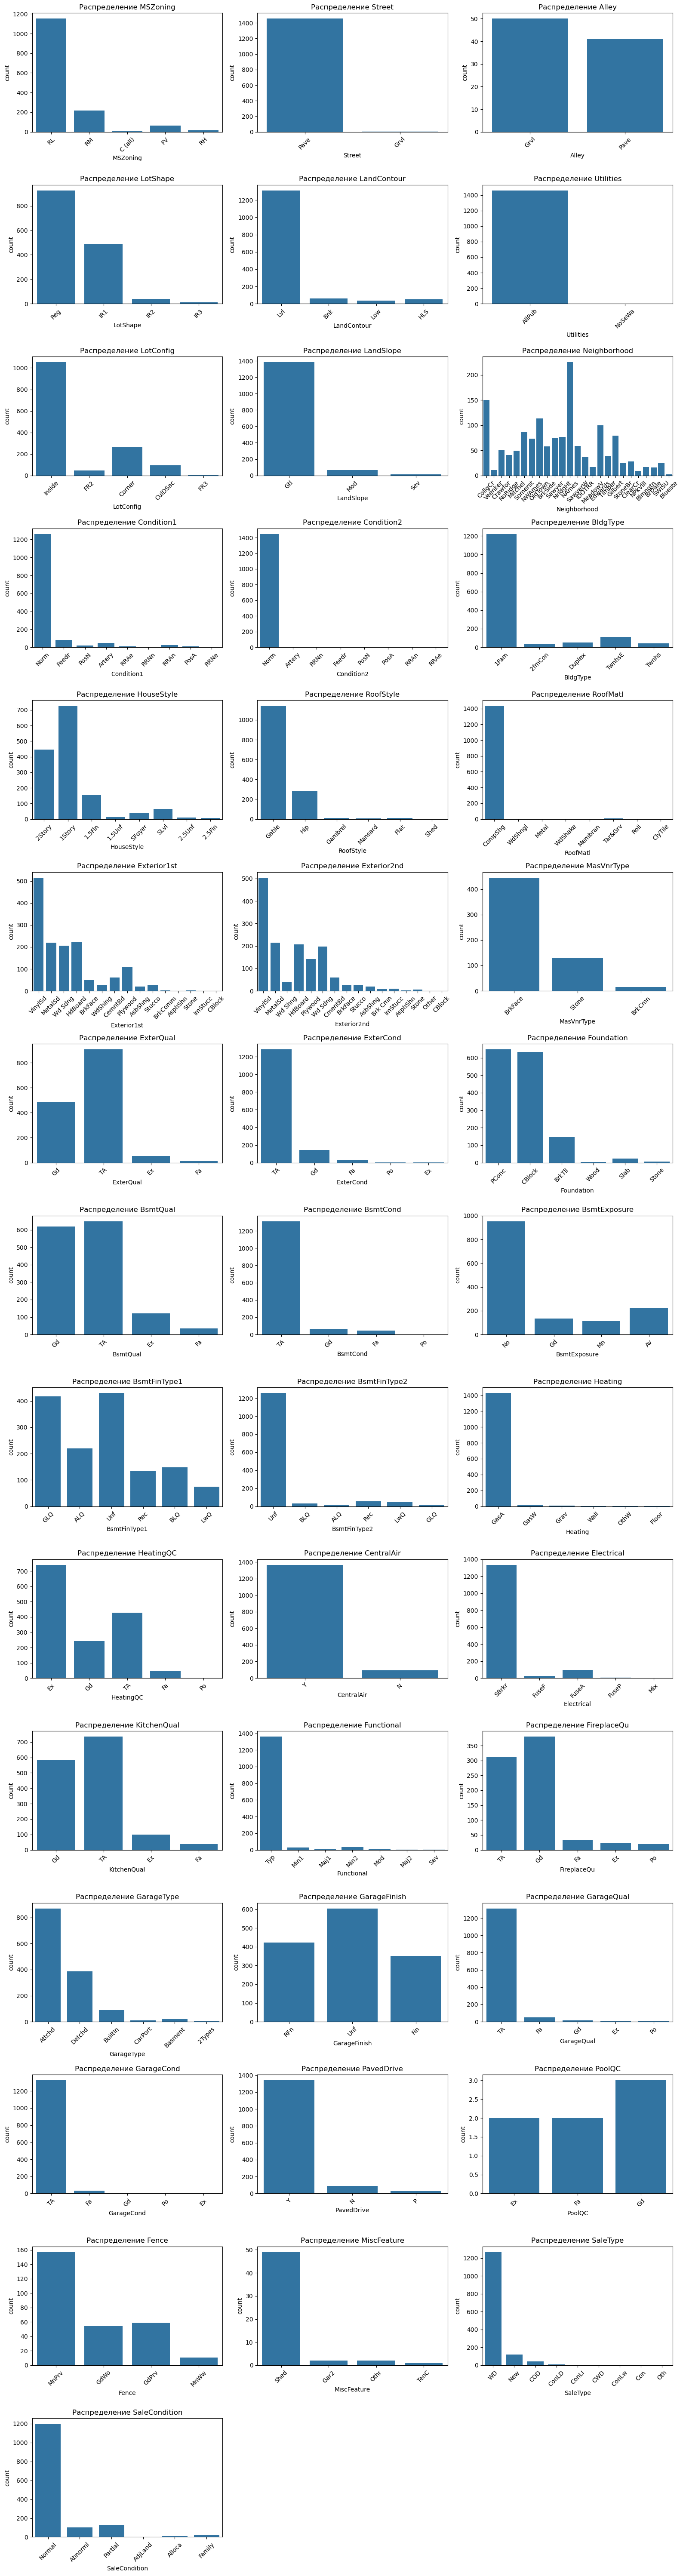

In [70]:
categorical_features = train.select_dtypes(include=['object', 'category']).columns
n_categorical = len(categorical_features)
cols = 3
rows = (n_categorical // cols) + int(n_categorical % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=train[col], ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(n_categorical, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


<Axes: >

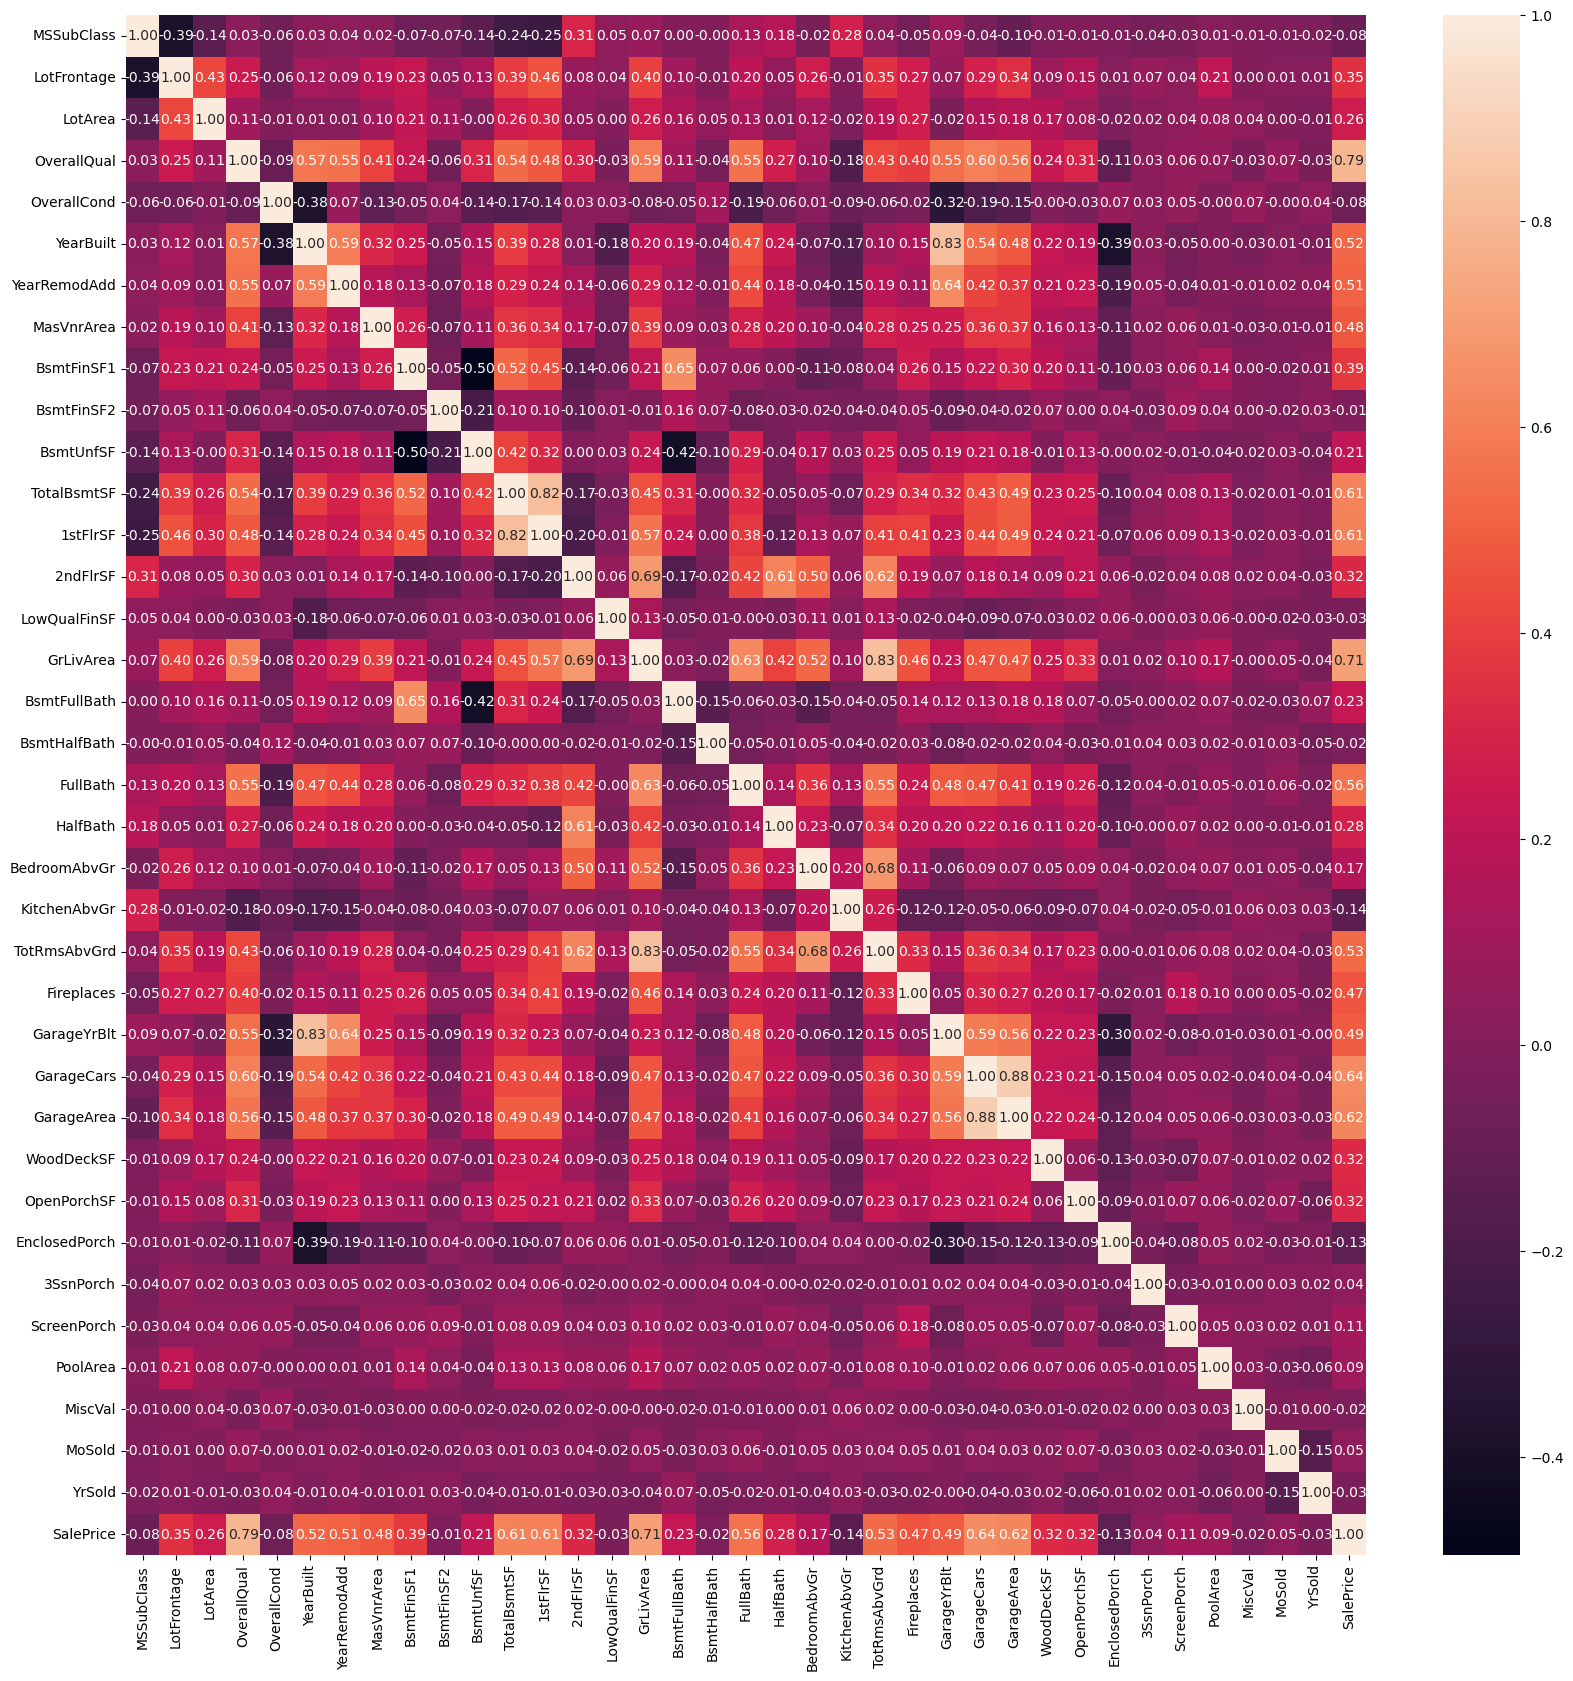

In [71]:
cor_matr = train[numeric_features]
plt.figure(figsize=(20,20))
sns.heatmap(cor_matr.corr(), annot=True, fmt='.2f')

In [74]:
nan = test.isna().sum()
print(nan.to_dict())

{'Id': 0, 'MSSubClass': 0, 'MSZoning': 4, 'LotFrontage': 227, 'LotArea': 0, 'Street': 0, 'Alley': 1352, 'LotShape': 0, 'LandContour': 0, 'Utilities': 2, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 894, 'MasVnrArea': 15, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 44, 'BsmtCond': 45, 'BsmtExposure': 44, 'BsmtFinType1': 42, 'BsmtFinSF1': 1, 'BsmtFinType2': 42, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 0, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 1, 'TotRmsAbvGrd': 0, 'Functional': 2, 'Fireplaces': 0, 'FireplaceQu': 730, 'GarageType': 76, 'G

In [75]:
nan = train.isna().sum()
print(nan.to_dict())

{'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 259, 'LotArea': 0, 'Street': 0, 'Alley': 1369, 'LotShape': 0, 'LandContour': 0, 'Utilities': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 872, 'MasVnrArea': 8, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinSF1': 0, 'BsmtFinType2': 38, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 1, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'TotRmsAbvGrd': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt

In [ ]:
'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType' #most frequent 
'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageArea' # mean